# Part 1. Basic EDA

## Step 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pd_web
from datetime import datetime
import yfinance as yf
yf.pdr_override()  # update pandas datareader (yahoo finance api)

import matplotlib.pyplot as plt
import seaborn as sns

# MacOS - 한글 폰트
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Graph Style
import mplcyberpunk
plt.style.use('cyberpunk')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [101]:
# TS - Statistics
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.stattools import adfuller

# TS - Deep learning
### PYTORCH 관련 모듈 추가<<

# Reg - linear 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Reg - Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Reg - Distance based 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Reg - Ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Reg - Deep Learning
from sklearn.neural_network import MLPRegressor

In [3]:
# Processing
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import mean_squared_error

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

## Step 2. Load Datasets

In [4]:
# industry group
tickers_i = ['AAPL','TSLA','MSFT','META','AMZN']

# market
tickers_m = ['SPY','QQQ','DIA','IWM','XLP','GLD','TLT','SHY']

#================================================
## SPY :: S&P500
## QQQ :: NASDAQ
## DIA :: Dow Jones
## IWM :: Russell 2000
## XLP :: Goods(필수소비재)
## GLD :: Gold(달러 대체재)
## TLT :: US Bond - Long(20+ 미 장기채)
## SHY :: US Bond - Short(5- 미 단기채)
#================================================

In [5]:
start_date = datetime(year=2010, month=1, day=2)
end_date = datetime(year=2022, month=12, day=31)

# industry group
df_i = pd_web.DataReader(tickers_i, start=start_date, end=end_date)
# market index
df_m = pd_web.DataReader(tickers_m, start=start_date, end=end_date)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  8 of 8 completed


In [6]:
display(df_i.head(3))
print(f'dates : {df_i.index[0]} ~ {df_i.index[-1]}')
print(f'stocks : {df_i["Adj Close"].columns.tolist()}')

Adj Close                                  Close               \
                AAPL    AMZN META       MSFT TSLA      AAPL    AMZN META   
Date                                                                       
2010-01-04  6.505279  6.6950  NaN  23.623903  NaN  7.643214  6.6950  NaN   
2010-01-05  6.516527  6.7345  NaN  23.631529  NaN  7.656429  6.7345  NaN   
2010-01-06  6.412873  6.6125  NaN  23.486506  NaN  7.534643  6.6125  NaN   

                            ...      Open                               \
                 MSFT TSLA  ...      AAPL    AMZN META       MSFT TSLA   
Date                        ...                                          
2010-01-04  30.950001  NaN  ...  7.622500  6.8125  NaN  30.620001  NaN   
2010-01-05  30.959999  NaN  ...  7.664286  6.6715  NaN  30.850000  NaN   
2010-01-06  30.770000  NaN  ...  7.656429  6.7300  NaN  30.879999  NaN   

               Volume                                 
                 AAPL       AMZN META      MSFT TSLA  
Date                                                  
2010-01-04  493729600  151998000  NaN  38409100  NaN  
2010-01-05  601904800  177038000  NaN  49749600  NaN  
2010-01-06  552160000  143576000  NaN  58182400  NaN  

[3 rows x 30 columns]

dates : 2010-01-04 00:00:00 ~ 2022-12-30 00:00:00
stocks : ['AAPL', 'AMZN', 'META', 'MSFT', 'TSLA']


In [7]:
display(df_m.head(3))
print(f'dates : {df_m.index[0]} ~ {df_m.index[-1]}')
print(f'stocks : {df_m["Adj Close"].columns.tolist()}')

Adj Close                                                          \
                  DIA         GLD        IWM        QQQ        SHY        SPY   
Date                                                                            
2010-01-04  78.535660  109.800003  53.236805  41.005459  73.517944  88.117889   
2010-01-05  78.409233  109.699997  53.053749  41.005459  73.606407  88.351151   
2010-01-06  78.461311  111.510002  53.003822  40.758141  73.615250  88.413368   

                                       Close              ...       Open  \
                  TLT        XLP         DIA         GLD  ...        TLT   
Date                                                      ...              
2010-01-04  63.228756  18.718468  105.660004  109.800003  ...  89.839996   
2010-01-05  63.637119  18.725483  105.489998  109.699997  ...  90.050003   
2010-01-06  62.785221  18.711449  105.559998  111.510002  ...  90.169998   

                        Volume                                         \
                  XLP      DIA       GLD       IWM       QQQ      SHY   
Date                                                                    
2010-01-04  26.450001  8977300  16224100  42863900  62822800  1220600   
2010-01-05  26.690001  6549200  14213100  55523100  62935600   598200   
2010-01-06  26.650000  6797200  24981900  59708600  96033000  1534900   

                                          
                  SPY      TLT       XLP  
Date                                      
2010-01-04  118944600  2829100   8465900  
2010-01-05  111579900  2841600  11805400  
2010-01-06  116074400  4099600   9267000  

[3 rows x 48 columns]

dates : 2010-01-04 00:00:00 ~ 2022-12-30 00:00:00
stocks : ['DIA', 'GLD', 'IWM', 'QQQ', 'SHY', 'SPY', 'TLT', 'XLP']


## Step 3. Drop NA's

In [8]:
df_i['Adj Close']

,AAPL,AMZN,META,MSFT,TSLA
Date,,,,,
2010-01-04,6.505279,6.695000,NaN,23.623903,NaN
2010-01-05,6.516527,6.734500,NaN,23.631529,NaN
2010-01-06,6.412873,6.612500,NaN,23.486506,NaN
2010-01-07,6.401017,6.500000,NaN,23.242252,NaN
2010-01-08,6.443573,6.676000,NaN,23.402534,NaN
...,...,...,...,...,...
2022-12-23,131.658981,85.250000,118.040001,238.133545,123.150002
2022-12-27,129.831772,83.040001,116.879997,236.367981,109.099998
2022-12-28,125.847855,81.820000,115.620003,233.944031,112.709999


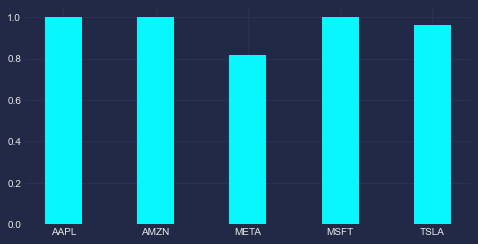

AAPL    1.000000
AMZN    1.000000
META    0.816932
MSFT    1.000000
TSLA    0.962714
dtype: float64


In [9]:
data = df_i['Adj Close'].notna().sum() / df_i['Adj Close'].shape[0]

plt.figure(figsize=(8,4))
plt.bar(x=data.index, height=data.values, width=0.4)
plt.show()

print(data)

In [10]:
# The first day that can tracking META's price
df_i['Adj Close']['META'].dropna().head(1)

Date
2012-05-18    38.23
Name: META, dtype: float64

In [11]:
# let's adjust the start_date to match the first day of the META's
start_date_adj = df_i['Adj Close']['META'].dropna().head(1).index[0]

# And only use "Adj Close" column
df_i_adj = df_i.loc[start_date_adj:, 'Adj Close']
display(df_i_adj)

# Check the NA
print(f'Values(NA) : \n{df_i_adj.isna().sum()}')

,AAPL,AMZN,META,MSFT,TSLA
Date,,,,,
2012-05-18,16.122002,10.692500,38.230000,23.721565,1.837333
2012-05-21,17.061274,10.905500,34.029999,24.110573,1.918000
2012-05-22,16.930258,10.766500,31.000000,24.118679,2.053333
2012-05-23,17.343365,10.864000,32.000000,23.591898,2.068000
2012-05-24,17.184078,10.762000,33.029999,23.559475,2.018667
...,...,...,...,...,...
2022-12-23,131.658981,85.250000,118.040001,238.133545,123.150002
2022-12-27,129.831772,83.040001,116.879997,236.367981,109.099998
2022-12-28,125.847855,81.820000,115.620003,233.944031,112.709999


Values(NA) : 
AAPL    0
AMZN    0
META    0
MSFT    0
TSLA    0
dtype: int64


In [12]:
# apply same metric to df_m 
df_m_adj = df_m.loc[start_date_adj:, 'Adj Close']
display(df_m_adj)

# Check the NA
print(f'Values(NA) : \n{df_m_adj.isna().sum()}')

,DIA,GLD,IWM,QQQ,SHY,SPY,TLT,XLP
Date,,,,,,,,
2012-05-18,97.450371,154.550003,64.020859,54.816559,76.197678,105.475662,95.615425,25.012053
2012-05-21,98.635796,154.649994,65.529427,56.348999,76.206696,107.288589,95.415283,25.109056
2012-05-22,98.651627,152.080002,65.135147,56.285904,76.179611,107.475571,94.352875,25.138901
2012-05-23,98.556747,151.619995,65.555153,56.394077,76.215675,107.532486,95.007240,25.071743
2012-05-24,98.880730,151.410004,65.692291,56.024502,76.188606,107.743866,94.645447,25.310530
...,...,...,...,...,...,...,...,...
2022-12-23,330.047607,167.259995,173.748886,266.946716,80.641205,381.454193,101.135094,74.820312
2022-12-27,330.485138,168.669998,172.583191,263.172577,80.532120,379.949921,99.135353,75.178589
2022-12-28,326.706696,167.910004,169.903076,259.697968,80.532120,375.227936,98.551277,74.243088


Values(NA) : 
DIA    0
GLD    0
IWM    0
QQQ    0
SHY    0
SPY    0
TLT    0
XLP    0
dtype: int64


> '로그'와 '차분'은 모두 예측 안정성을 확보하기 위함

### 3-1. 기본 수익률 분포 (1일 변화량)
- 1일 전 대비 현재 주가(기본 주가)

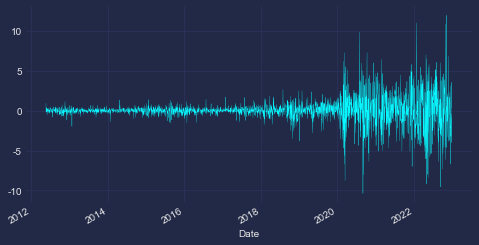

In [13]:
plt.figure(figsize=(8,4))
data = df_i_adj.diff(1)['AAPL']
data.plot(linewidth=0.25)

plt.show()

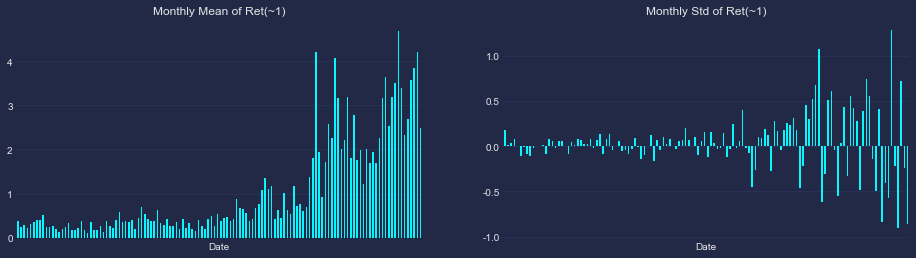

In [14]:
data_stats = data.dropna().resample('M')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
data_stats.std().plot.bar(xticks=[], ax=axes[0])
data_stats.mean().plot.bar(xticks=[], ax=axes[1])

axes[0].set_title('Monthly Mean of Ret(~1)')
axes[1].set_title('Monthly Std of Ret(~1)')
plt.show()

### 3-2. 로그 수익률 1차 차분 분포 (로그 변환 + 1일 변화량)
- 1일 전 대비 현재 주가(로그변환된 주가)

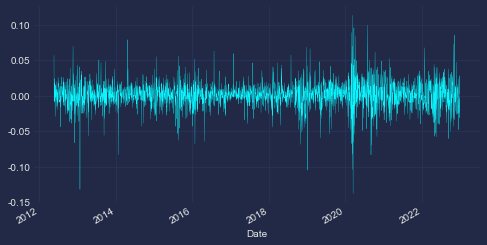

In [15]:
plt.figure(figsize=(8,4))
data = np.log(df_i_adj).diff(1)['AAPL']
data.plot(linewidth=0.25)
plt.show()

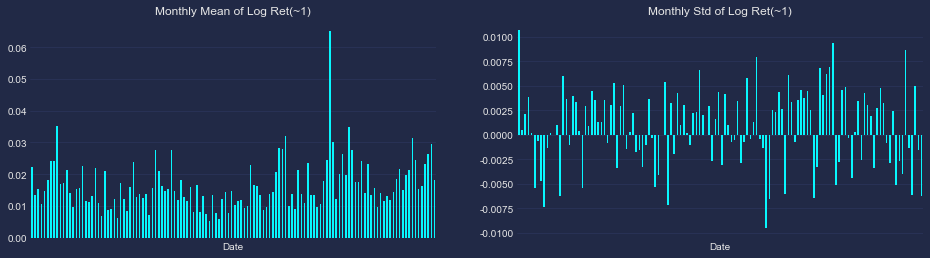

In [16]:
data_stats = data.dropna().resample('M')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
data_stats.std().plot.bar(xticks=[], ax=axes[0])
data_stats.mean().plot.bar(xticks=[], ax=axes[1])

axes[0].set_title('Monthly Mean of Log Ret(~1)')
axes[1].set_title('Monthly Std of Log Ret(~1)')

plt.show()

### 3-3. 로그 수익률 5차 차분 분포 (로그 변환 + 5일 변화량)
- 5일 전 대비 현재 주가(로그변환된 주가)

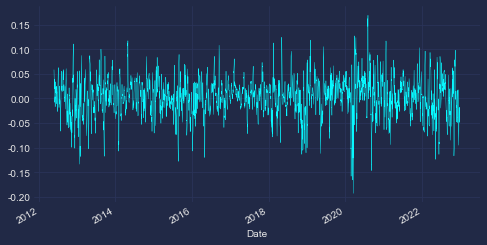

In [17]:
plt.figure(figsize=(8,4))
data = np.log(df_i_adj).diff(5)['AAPL']
data.plot(linewidth=0.4)
plt.show()

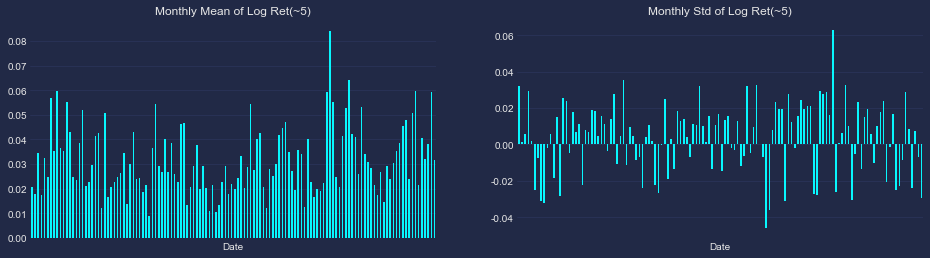

In [18]:
data_stats = data.dropna().resample('M')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
data_stats.std().plot.bar(xticks=[], ax=axes[0])
data_stats.mean().plot.bar(xticks=[], ax=axes[1])

axes[0].set_title('Monthly Mean of Log Ret(~5)')
axes[1].set_title('Monthly Std of Log Ret(~5)')
plt.show()

# Part 2. Correlation and Stationarity

## Step 1. Data Preprocessing

In [20]:
# y (target to forcasting)
y = np.log(df_i_adj['AAPL']).diff(1).shift(-1)

# x (y-delayed)
y_delayed = pd.concat([np.log(df_i_adj['AAPL']).diff(x) for x in [5,20,60]], axis=1)
y_delayed.columns = ['AAPL_d5', 'AAPL_d20', 'AAPL_d60']

# x (y-related, i)
X_i = np.log(df_i_adj).diff(1)
X_i.columns = [f'{x}_d1' for x in df_i_adj.columns]
# x (y-related, m)
X_m = np.log(df_m_adj).diff(1)
X_m.columns = [f'{x}_d1' for x in df_m_adj.columns]

df_Xy = pd.concat([X_i, X_m, y_delayed, y], axis=1).dropna()
df_Xy

,AAPL_d1,AMZN_d1,META_d1,MSFT_d1,TSLA_d1,DIA_d1,GLD_d1,IWM_d1,QQQ_d1,SHY_d1,SPY_d1,TLT_d1,XLP_d1,AAPL_d5,AAPL_d20,AAPL_d60,AAPL
Date,,,,,,,,,,,,,,,,,
2012-08-14,0.002679,0.003221,-0.058139,-0.001989,-0.057782,0.000303,-0.005528,-0.002384,0.000447,-0.000236,0.000142,-0.013640,0.003923,0.021497,0.044253,0.179089,-0.001363
2012-08-15,-0.001363,0.017977,0.039447,0.002321,-0.000680,0.000456,0.003218,0.008755,0.002532,-0.000356,0.001136,-0.014156,0.000560,0.021827,0.044011,0.121101,0.008697
2012-08-16,0.008697,0.017246,-0.064790,0.019023,0.030153,0.006433,0.005958,0.010407,0.011831,-0.000118,0.007352,-0.008557,0.002512,0.024838,0.039502,0.137507,0.018327
2012-08-17,0.018327,-0.001574,-0.042144,0.003891,-0.009617,0.001504,0.001021,0.007000,0.004401,0.000118,0.001337,0.004863,0.000836,0.041603,0.074274,0.131726,0.025952
2012-08-20,0.025952,-0.003406,0.049165,-0.005192,-0.016802,-0.000302,0.003440,-0.002205,0.001463,0.000000,0.000071,0.002054,0.000000,0.054293,0.101004,0.166905,-0.013760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,-0.024060,-0.034947,-0.022291,-0.025860,-0.093023,-0.010062,-0.012159,-0.013162,-0.024769,-0.000614,-0.014369,-0.000193,-0.002270,-0.031782,-0.133201,-0.123368,-0.002802
2022-12-23,-0.002802,0.017274,0.007824,0.002265,-0.017707,0.005044,0.002994,0.004540,0.002247,-0.000492,0.005736,-0.014769,0.005201,-0.019898,-0.116214,-0.075803,-0.013976
2022-12-27,-0.013976,-0.026266,-0.009876,-0.007442,-0.121138,0.001325,0.008395,-0.006732,-0.014239,-0.001354,-0.003951,-0.019971,0.004777,-0.017836,-0.103575,-0.059279,-0.031166


## Step 2. Correlation check

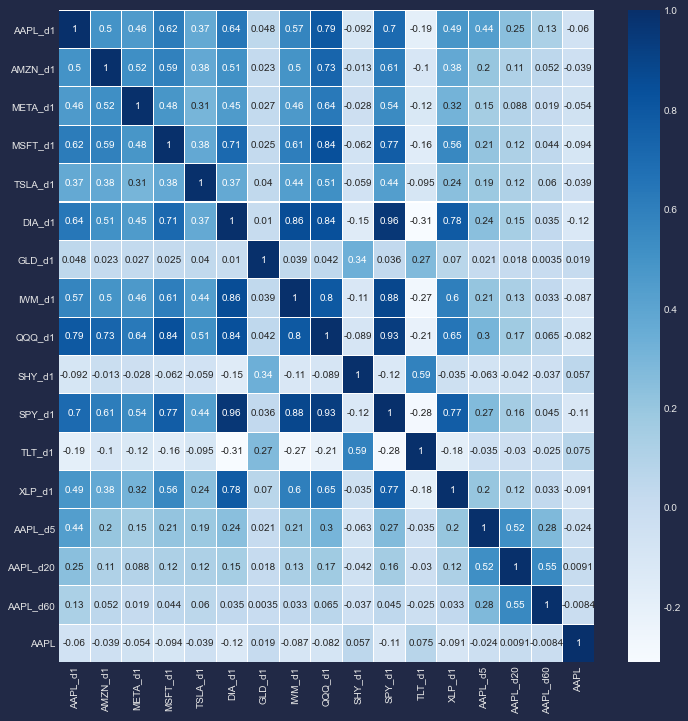

In [21]:
plt.figure(figsize=(12,12))

sns.heatmap(df_Xy.corr(), annot=True, cmap='Blues', linewidth=0.1);
plt.show()

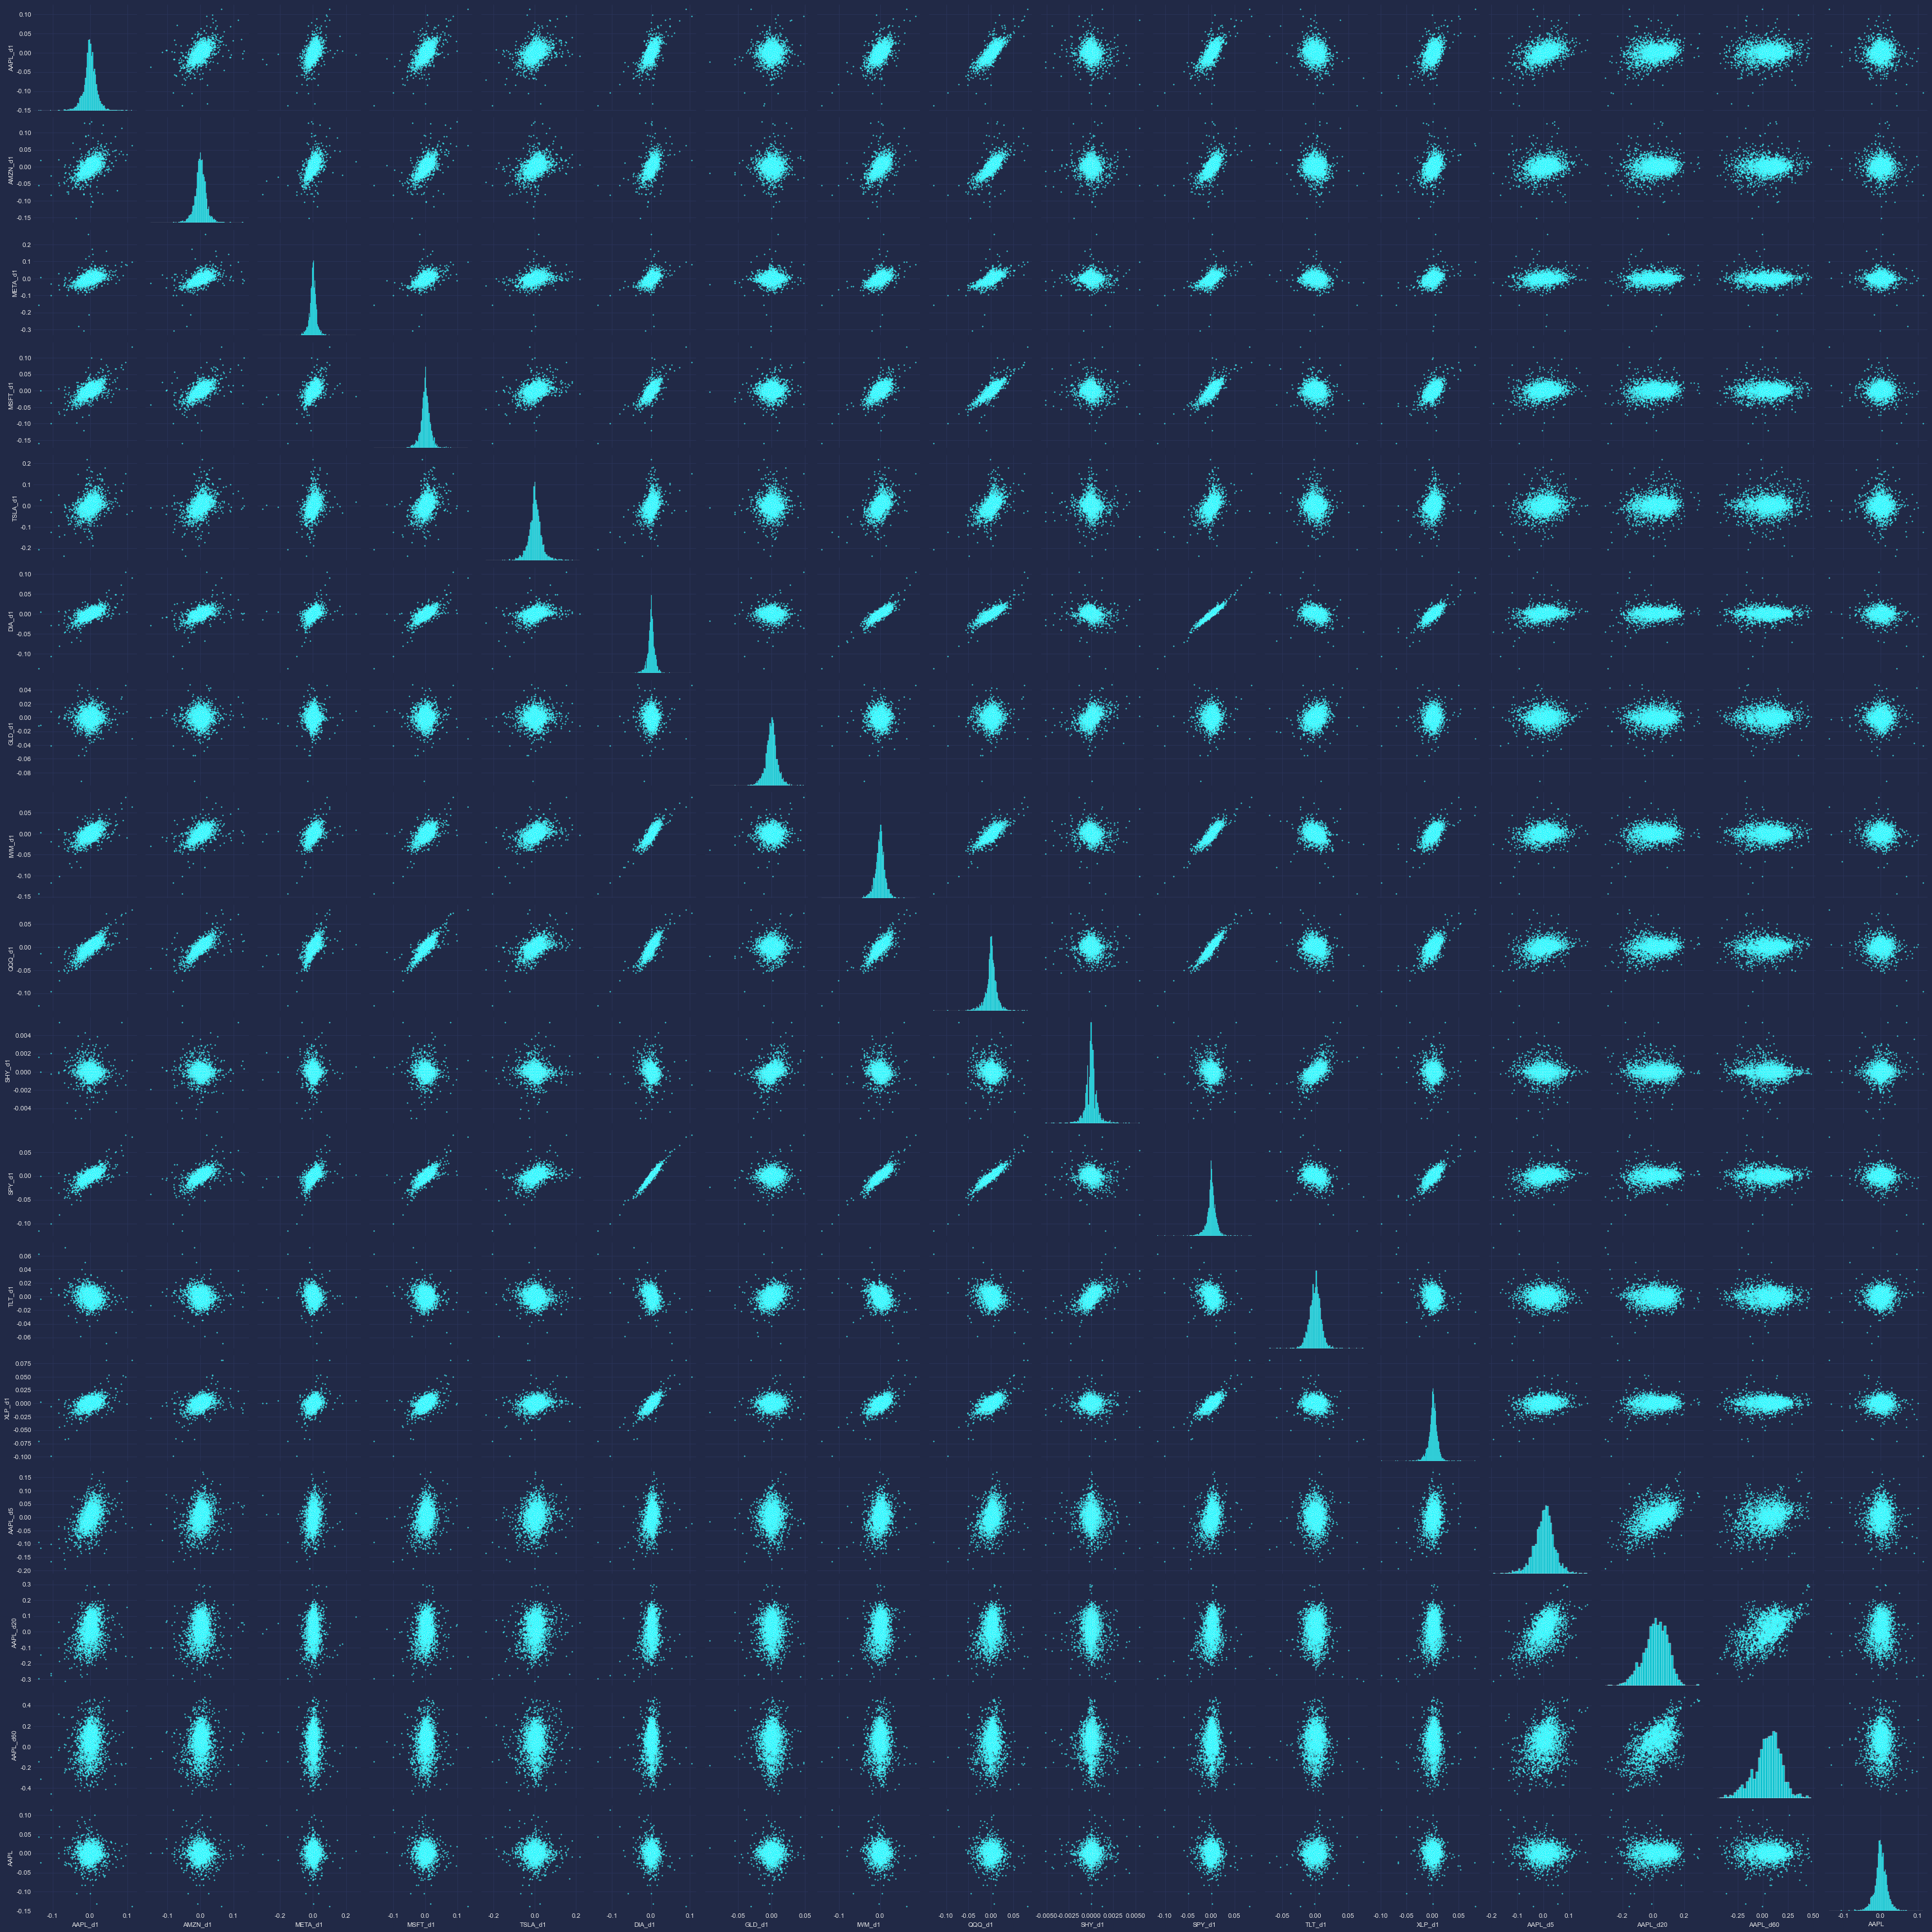

In [22]:
sns.pairplot(df_Xy, plot_kws={'s':3})
plt.show()

In [23]:
from scipy.stats import skew, kurtosis

print("<< skewness >> ")
print(f"AAPL_d1 : {skew(df_Xy['AAPL_d1']):.2f}")
print(f"AAPL_d5 : {skew(df_Xy['AAPL_d5']):.2f}")
print(f"AAPL_d20 : {skew(df_Xy['AAPL_d20']):.2f}")
print(f"AAPL_d60 : {skew(df_Xy['AAPL_d60']):.2f}")

print('\n')
print("<< kurtosis >> ")
print(f"AAPL_d1 : {kurtosis(df_Xy['AAPL_d1']):.2f}")
print(f"AAPL_d5 : {kurtosis(df_Xy['AAPL_d5']):.2f}")
print(f"AAPL_d20 : {kurtosis(df_Xy['AAPL_d20']):.2f}")
print(f"AAPL_d60 : {kurtosis(df_Xy['AAPL_d60']):.2f}")

<< skewness >> 
AAPL_d1 : -0.33
AAPL_d5 : -0.31
AAPL_d20 : -0.42
AAPL_d60 : -0.40


<< kurtosis >> 
AAPL_d1 : 5.85
AAPL_d5 : 1.44
AAPL_d20 : 0.36
AAPL_d60 : 0.49


- 주식 수익률 데이터는 우측으로 기울고(negative skew), 꼬리가 두꺼운(high kurtosis) 유사 정규분포 꼴
- 애플은 꾸준히 우상햔한 기업, 따라서 20일, 60일 전 대비 수익률은 negative skew가 더 강함
- 또한, 꾸준히 우상향한 탓에 일간 변화량보다 20일, 60일 전 대비 수익률이 조금 더 확정적, 즉 예측불가구간의 확률이 더 낮음(low kurtosis)

### 2-1. Drop Columns - QQQ, IWM, DIA

- SPY, QQQ, IWM, DIA의 상관관계가 매우 높음
- 대표 시장 추종 지수 SPY 하나만 사용

In [54]:
df_Xy

,AAPL_d1,AMZN_d1,META_d1,MSFT_d1,TSLA_d1,DIA_d1,GLD_d1,IWM_d1,QQQ_d1,SHY_d1,SPY_d1,TLT_d1,XLP_d1,AAPL_d5,AAPL_d20,AAPL_d60,AAPL
Date,,,,,,,,,,,,,,,,,
2012-08-14,0.002679,0.003221,-0.058139,-0.001989,-0.057782,0.000303,-0.005528,-0.002384,0.000447,-0.000236,0.000142,-0.013640,0.003923,0.021497,0.044253,0.179089,-0.001363
2012-08-15,-0.001363,0.017977,0.039447,0.002321,-0.000680,0.000456,0.003218,0.008755,0.002532,-0.000356,0.001136,-0.014156,0.000560,0.021827,0.044011,0.121101,0.008697
2012-08-16,0.008697,0.017246,-0.064790,0.019023,0.030153,0.006433,0.005958,0.010407,0.011831,-0.000118,0.007352,-0.008557,0.002512,0.024838,0.039502,0.137507,0.018327
2012-08-17,0.018327,-0.001574,-0.042144,0.003891,-0.009617,0.001504,0.001021,0.007000,0.004401,0.000118,0.001337,0.004863,0.000836,0.041603,0.074274,0.131726,0.025952
2012-08-20,0.025952,-0.003406,0.049165,-0.005192,-0.016802,-0.000302,0.003440,-0.002205,0.001463,0.000000,0.000071,0.002054,0.000000,0.054293,0.101004,0.166905,-0.013760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,-0.024060,-0.034947,-0.022291,-0.025860,-0.093023,-0.010062,-0.012159,-0.013162,-0.024769,-0.000614,-0.014369,-0.000193,-0.002270,-0.031782,-0.133201,-0.123368,-0.002802
2022-12-23,-0.002802,0.017274,0.007824,0.002265,-0.017707,0.005044,0.002994,0.004540,0.002247,-0.000492,0.005736,-0.014769,0.005201,-0.019898,-0.116214,-0.075803,-0.013976
2022-12-27,-0.013976,-0.026266,-0.009876,-0.007442,-0.121138,0.001325,0.008395,-0.006732,-0.014239,-0.001354,-0.003951,-0.019971,0.004777,-0.017836,-0.103575,-0.059279,-0.031166


In [57]:
df_Xy.drop(['DIA_d1', 'IWM_d1', 'QQQ_d1'], axis=1, inplace=True)
df_Xy

,AAPL_d1,AMZN_d1,META_d1,MSFT_d1,TSLA_d1,GLD_d1,SHY_d1,SPY_d1,TLT_d1,XLP_d1,AAPL_d5,AAPL_d20,AAPL_d60,AAPL
Date,,,,,,,,,,,,,,
2012-08-14,0.002679,0.003221,-0.058139,-0.001989,-0.057782,-0.005528,-0.000236,0.000142,-0.013640,0.003923,0.021497,0.044253,0.179089,-0.001363
2012-08-15,-0.001363,0.017977,0.039447,0.002321,-0.000680,0.003218,-0.000356,0.001136,-0.014156,0.000560,0.021827,0.044011,0.121101,0.008697
2012-08-16,0.008697,0.017246,-0.064790,0.019023,0.030153,0.005958,-0.000118,0.007352,-0.008557,0.002512,0.024838,0.039502,0.137507,0.018327
2012-08-17,0.018327,-0.001574,-0.042144,0.003891,-0.009617,0.001021,0.000118,0.001337,0.004863,0.000836,0.041603,0.074274,0.131726,0.025952
2012-08-20,0.025952,-0.003406,0.049165,-0.005192,-0.016802,0.003440,0.000000,0.000071,0.002054,0.000000,0.054293,0.101004,0.166905,-0.013760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,-0.024060,-0.034947,-0.022291,-0.025860,-0.093023,-0.012159,-0.000614,-0.014369,-0.000193,-0.002270,-0.031782,-0.133201,-0.123368,-0.002802
2022-12-23,-0.002802,0.017274,0.007824,0.002265,-0.017707,0.002994,-0.000492,0.005736,-0.014769,0.005201,-0.019898,-0.116214,-0.075803,-0.013976
2022-12-27,-0.013976,-0.026266,-0.009876,-0.007442,-0.121138,0.008395,-0.001354,-0.003951,-0.019971,0.004777,-0.017836,-0.103575,-0.059279,-0.031166


## Step 3. Correlation by month

- 예측변수의 지연값(d5, d20, d60)은 서로 양의 상관관계가 존재한다. 
- d5와 d20의 경우 0.52, d20과 d60은 0.55로 꽤 밀접한 관련이 있다.
- 따라서 이 중 일부 변수를 소거할지, 그대로 사용할지 판단하기 위해 각 기간(by month)별 상관계수를 확인해보자.
- 만약, 전체 기간에 대해 꾸준히 관련이 있고 반대의 움직임이 존재하지 않는다면 일부 변수를 소거한다.

In [24]:
window_size = 20
i_li = np.arange(0, df_Xy.shape[0], window_size)
i_li

array([   0,   20,   40,   60,   80,  100,  120,  140,  160,  180,  200,
        220,  240,  260,  280,  300,  320,  340,  360,  380,  400,  420,
        440,  460,  480,  500,  520,  540,  560,  580,  600,  620,  640,
        660,  680,  700,  720,  740,  760,  780,  800,  820,  840,  860,
        880,  900,  920,  940,  960,  980, 1000, 1020, 1040, 1060, 1080,
       1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300,
       1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520,
       1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740,
       1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960,
       1980, 2000, 2020, 2040, 2060, 2080, 2100, 2120, 2140, 2160, 2180,
       2200, 2220, 2240, 2260, 2280, 2300, 2320, 2340, 2360, 2380, 2400,
       2420, 2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600])

- 5일, 20일, 60일 전 대비 현재 수익률 상관관계

In [25]:
def get_r_between_cols(col1, col2):
    r_li = []
    r_ts = []
    for i in i_li:
        start_i = i
        end_i = i+window_size
        
        df_window = df_Xy[[col1,col2]].iloc[start_i:end_i]
        r = df_window.corr().iloc[0,1]
        r_t = df_window.index[0]
        
        r_li.append(r)
        r_ts.append(r_t)
    return r_li, r_ts

In [26]:
r_aapl_20_60 = get_r_between_cols('AAPL_d20', 'AAPL_d60')
r_aapl_5_60 = get_r_between_cols('AAPL_d5', 'AAPL_d60')
r_aapl_5_20 = get_r_between_cols('AAPL_d5', 'AAPL_d20')

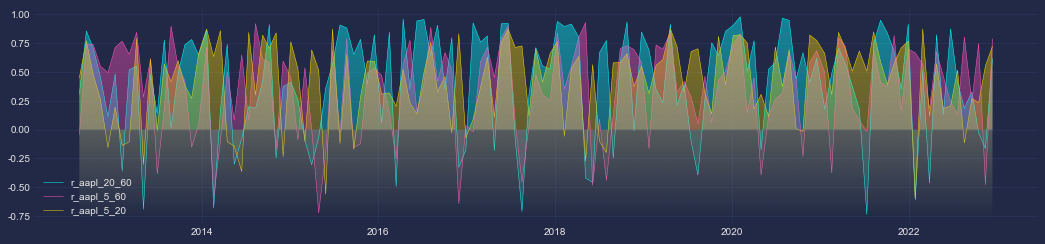

In [27]:
x = r_aapl_20_60[1]

plt.figure(figsize=(18,4))
plt.fill_between(x=x, y1=r_aapl_20_60[0], alpha=0.2)
plt.plot(x, r_aapl_20_60[0], linewidth=0.5, label='r_aapl_20_60')

plt.fill_between(x=x, y1=r_aapl_5_60[0], alpha=0.2)
plt.plot(x, r_aapl_5_60[0], linewidth=0.5, label='r_aapl_5_60')

plt.fill_between(x=x, y1=r_aapl_5_20[0], alpha=0.2)
plt.plot(x, r_aapl_5_20[0], linewidth=0.5, label='r_aapl_5_20')

plt.legend()
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.3, gradient_start='bottom')

plt.show()

- 많은 기간에서 양의 상관관계를 보이지만 상당 기간에서 음의 상관관계가 존재한다.
- 따라서 일부 변수를 제거했을 때 발생하는 정보손실을 고려해 모든 변수를 사용하도록 한다.

## Step 4. Stationary Test

- 예측변수(AAPL)과 나머지 변수들간 상관관계 x

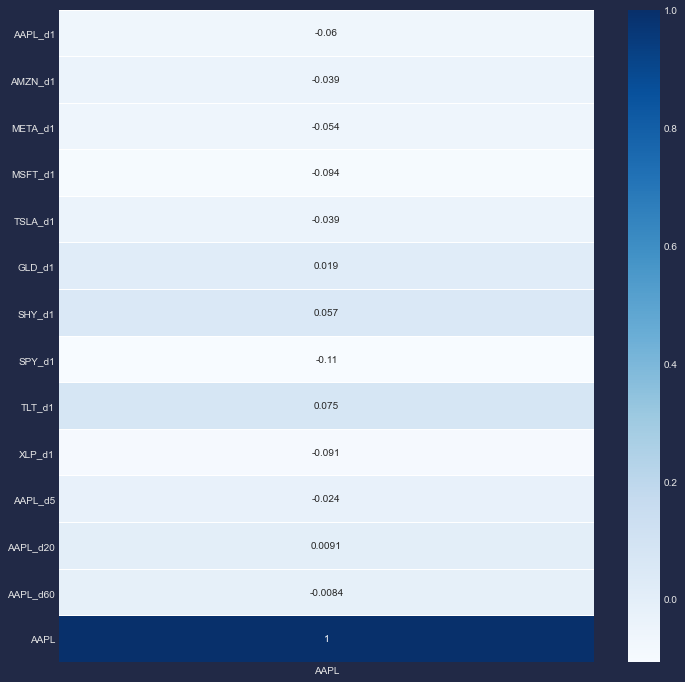

In [58]:
plt.figure(figsize=(12,12))

sns.heatmap(df_Xy.corr()[['AAPL']], annot=True, cmap='Blues', linewidth=0.1);
plt.show()

### 4-1. 시계열 분해

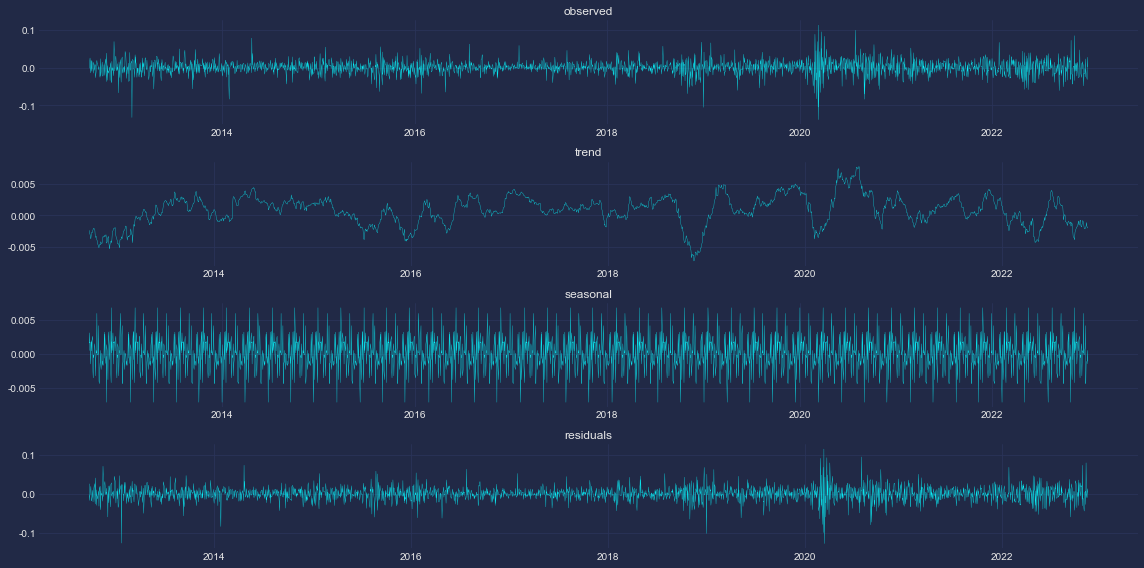

In [59]:
res = sm.tsa.seasonal_decompose(df_Xy['AAPL'], period=60)

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16,8))

axes[0].plot(res.observed, linewidth=0.3)
axes[0].set_title('observed')

axes[1].plot(res.trend, linewidth=0.3)
axes[1].set_title('trend')

axes[2].plot(res.seasonal, linewidth=0.3)
axes[2].set_title('seasonal')

axes[3].plot(res.resid, linewidth=0.3)
axes[3].set_title('residuals')

plt.tight_layout()
plt.show()

In [60]:
res.trend.dropna()

Date
2012-09-26   -0.002375
2012-09-27   -0.002499
2012-09-28   -0.002816
2012-10-01   -0.003455
2012-10-02   -0.003701
                ...   
2022-11-09   -0.001660
2022-11-10   -0.001126
2022-11-11   -0.001500
2022-11-14   -0.001990
2022-11-15   -0.001965
Name: trend, Length: 2552, dtype: float64

### 4-2. 정상성 검정

In [61]:
def adf_test(x):
    adf_res = adfuller(x.dropna(), autolag='AIC')
    stats, pval, c = adf_res[0], adf_res[1], adf_res[4]
    print(f'<<{x.name}>>')
    print(f'stats: {stats:.2f}')
    print(f'p-value: {pval:.2f}')
    print(f'critical values: {c}\n')

In [62]:
adf_test(res.observed)
adf_test(res.trend)

<<AAPL>>
stats: -16.40
p-value: 0.00
critical values: {'1%': -3.432864698592546, '5%': -2.8626509998056635, '10%': -2.567361424947927}

<<trend>>
stats: -6.04
p-value: 0.00
critical values: {'1%': -3.4329434877271816, '5%': -2.862685793891119, '10%': -2.567379949649765}



- 앞서 분석 데이터에 대해 로그차분(수익률)을 수행했다.
- 따라서 예측변수 y(AAPL)는 물론 y의 trend에도 어떠한 추세나 계절성이 존재해선 안된다.
- 추세가 남아있다면 차분(diff) 수를 늘려야 한다.
- 그러나 분석 결과 y와 y의 trend는 모두 (약)정상성 검정을 통과(h0 기각)하였으므로 해당 데이터를 계속해서 사용해 예측 모델을 구현한다.

# Part 3. Modeling

## Step 1. Train-Test Dataset Split

In [63]:
df_Xy

,AAPL_d1,AMZN_d1,META_d1,MSFT_d1,TSLA_d1,GLD_d1,SHY_d1,SPY_d1,TLT_d1,XLP_d1,AAPL_d5,AAPL_d20,AAPL_d60,AAPL
Date,,,,,,,,,,,,,,
2012-08-14,0.002679,0.003221,-0.058139,-0.001989,-0.057782,-0.005528,-0.000236,0.000142,-0.013640,0.003923,0.021497,0.044253,0.179089,-0.001363
2012-08-15,-0.001363,0.017977,0.039447,0.002321,-0.000680,0.003218,-0.000356,0.001136,-0.014156,0.000560,0.021827,0.044011,0.121101,0.008697
2012-08-16,0.008697,0.017246,-0.064790,0.019023,0.030153,0.005958,-0.000118,0.007352,-0.008557,0.002512,0.024838,0.039502,0.137507,0.018327
2012-08-17,0.018327,-0.001574,-0.042144,0.003891,-0.009617,0.001021,0.000118,0.001337,0.004863,0.000836,0.041603,0.074274,0.131726,0.025952
2012-08-20,0.025952,-0.003406,0.049165,-0.005192,-0.016802,0.003440,0.000000,0.000071,0.002054,0.000000,0.054293,0.101004,0.166905,-0.013760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,-0.024060,-0.034947,-0.022291,-0.025860,-0.093023,-0.012159,-0.000614,-0.014369,-0.000193,-0.002270,-0.031782,-0.133201,-0.123368,-0.002802
2022-12-23,-0.002802,0.017274,0.007824,0.002265,-0.017707,0.002994,-0.000492,0.005736,-0.014769,0.005201,-0.019898,-0.116214,-0.075803,-0.013976
2022-12-27,-0.013976,-0.026266,-0.009876,-0.007442,-0.121138,0.008395,-0.001354,-0.003951,-0.019971,0.004777,-0.017836,-0.103575,-0.059279,-0.031166


In [110]:
df_Xy

,AAPL_d1,AMZN_d1,META_d1,MSFT_d1,TSLA_d1,GLD_d1,SHY_d1,SPY_d1,TLT_d1,XLP_d1,AAPL_d5,AAPL_d20,AAPL_d60,AAPL
Date,,,,,,,,,,,,,,
2012-08-14,0.002679,0.003221,-0.058139,-0.001989,-0.057782,-0.005528,-0.000236,0.000142,-0.013640,0.003923,0.021497,0.044253,0.179089,-0.001363
2012-08-15,-0.001363,0.017977,0.039447,0.002321,-0.000680,0.003218,-0.000356,0.001136,-0.014156,0.000560,0.021827,0.044011,0.121101,0.008697
2012-08-16,0.008697,0.017246,-0.064790,0.019023,0.030153,0.005958,-0.000118,0.007352,-0.008557,0.002512,0.024838,0.039502,0.137507,0.018327
2012-08-17,0.018327,-0.001574,-0.042144,0.003891,-0.009617,0.001021,0.000118,0.001337,0.004863,0.000836,0.041603,0.074274,0.131726,0.025952
2012-08-20,0.025952,-0.003406,0.049165,-0.005192,-0.016802,0.003440,0.000000,0.000071,0.002054,0.000000,0.054293,0.101004,0.166905,-0.013760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,-0.024060,-0.034947,-0.022291,-0.025860,-0.093023,-0.012159,-0.000614,-0.014369,-0.000193,-0.002270,-0.031782,-0.133201,-0.123368,-0.002802
2022-12-23,-0.002802,0.017274,0.007824,0.002265,-0.017707,0.002994,-0.000492,0.005736,-0.014769,0.005201,-0.019898,-0.116214,-0.075803,-0.013976
2022-12-27,-0.013976,-0.026266,-0.009876,-0.007442,-0.121138,0.008395,-0.001354,-0.003951,-0.019971,0.004777,-0.017836,-0.103575,-0.059279,-0.031166


In [113]:
X = df_Xy.drop('AAPL', axis=1)
y = df_Xy['AAPL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f'train dataset : {X_train.shape,  y_train.shape}')
print(f'test dataset : {X_test.shape, y_test.shape}')

train dataset : ((2089, 13), (2089,))
test dataset : ((523, 13), (523,))


## Step 2. Model Selection

### 2-1. Modeling

In [115]:
models = []

# Basic Regression model
models.append(('Lr', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))

# Distance Based model
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))

# Tree & Ensemble model
# --- Basic Tree
models.append(('Tree', DecisionTreeRegressor()))
# --- Boosting
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('GradBoost', GradientBoostingRegressor()))
# --- Bagging
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTrees', ExtraTreesRegressor()))

# Neural Network model
models.append(('MLP', MLPRegressor()))

In [116]:
models

[('Lr', LinearRegression()),
 ('Lasso', Lasso()),
 ('ElasticNet', ElasticNet()),
 ('KNN', KNeighborsRegressor()),
 ('SVR', SVR()),
 ('Tree', DecisionTreeRegressor()),
 ('AdaBoost', AdaBoostRegressor()),
 ('GradBoost', GradientBoostingRegressor()),
 ('RandomForest', RandomForestRegressor()),
 ('ExtraTrees', ExtraTreesRegressor()),
 ('MLP', MLPRegressor())]

In [117]:
res_cv = []
res_train = []
res_test = []

for _name, model in models:
    print(f'Start to build a "{_name}" model..')
    
    # cross validation
    kfold = KFold(n_splits=10) # shuffle=False
    score = cross_val_score(model, 
                             X_train, y_train,
                             cv=kfold, 
                             scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-score)
    res_cv.append(rmse_cv)
    
    # predict train-set
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    res_train.append(rmse_train)
    
    # predict test-set
    y_test_pred = model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    res_test.append(rmse_test)
    print(f'... clear! >> [mean errors] cv: {np.mean(rmse_cv):.3f} | train: {np.mean(rmse_train):.3f} | test: {np.mean(rmse_test):.3f}')
    

Start to build a "Lr" model..
... clear! >> [mean errors] cv: 0.017 | train: 0.018 | test: 0.020
Start to build a "Lasso" model..
... clear! >> [mean errors] cv: 0.017 | train: 0.018 | test: 0.019
Start to build a "ElasticNet" model..
... clear! >> [mean errors] cv: 0.017 | train: 0.018 | test: 0.019
Start to build a "KNN" model..
... clear! >> [mean errors] cv: 0.019 | train: 0.016 | test: 0.021
Start to build a "SVR" model..
... clear! >> [mean errors] cv: 0.023 | train: 0.023 | test: 0.025
Start to build a "Tree" model..
... clear! >> [mean errors] cv: 0.025 | train: 0.000 | test: 0.029
Start to build a "AdaBoost" model..
... clear! >> [mean errors] cv: 0.018 | train: 0.017 | test: 0.020
Start to build a "GradBoost" model..
... clear! >> [mean errors] cv: 0.018 | train: 0.015 | test: 0.021
Start to build a "RandomForest" model..
... clear! >> [mean errors] cv: 0.018 | train: 0.007 | test: 0.020
Start to build a "ExtraTrees" model..
... clear! >> [mean errors] cv: 0.018 | train: 0.00

- cross validation은 해당 모델이 얼마나 Robust한가, 즉 이상값(혹은 특이값)에 대해 민감도를 확인
- 시계열의 경우 일반적으로 cross validation을 사용하지 않음. 데이터가 100개라고 가정하면, 앞의 80개로 뒤 20개를 예측해야 하나 cross validation은 그 20개를 앞, 중간에서도 추출하기 때문
- 그러나 시계열데이터에서도 cross validation이 일부 유용한 점이 있는데, 추세와 계절성을 제거해 정상성을 확보한 시계열에 대해 내재된 패턴을 추정하는 경우.
- 만약 예측을 위한 내재 패턴이 존재한다면, 모든 시계열 구간에 걸쳐 통용될 수록 좋은 모델.
- 2010년의 패턴이 2021년에도 적용될 뿐만 아니라 2021년에서 추출한 패턴이 과거 2010년에도 적용된다는 의미.

### 2-2. Çompare Cross Validation Scores

In [118]:
x_labels = [x for x,_ in models]
x_loc = np.arange(1, 1+len(x_labels))

In [119]:
sort_idx = np.argsort([np.mean(x) for x in res_cv])[::-1]

data = [np.array(x) for x in np.array(res_cv)[sort_idx].tolist()]
data_labels = np.array(x_labels)[sort_idx]

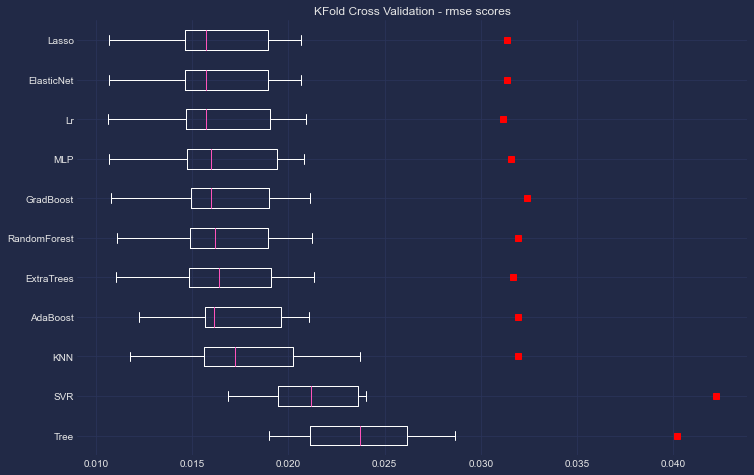

In [120]:
plt.figure(figsize=(12,8))

plt.boxplot(data, 0,  'rs', 0)
plt.yticks(x_loc, data_labels)
plt.title('KFold Cross Validation - rmse scores')

plt.show()

- 좌측으로 쏠린 모델일수록 cv 평가성능이 좋음
- Lasso, ElasticNet이 가장 예측력 우수
- 반면, 트리모델(Tree)과 거리기반 모형(KNN, SVR)의 성능은 떨어짐

### 2-3. Compare Model Accuracy(check error with rmse)

In [121]:
sort_idx = np.argsort(res_test)[::-1]

data_labels = np.array(x_labels)[sort_idx]
data_train = np.array(res_train)[sort_idx]
data_test = np.array(res_test)[sort_idx]

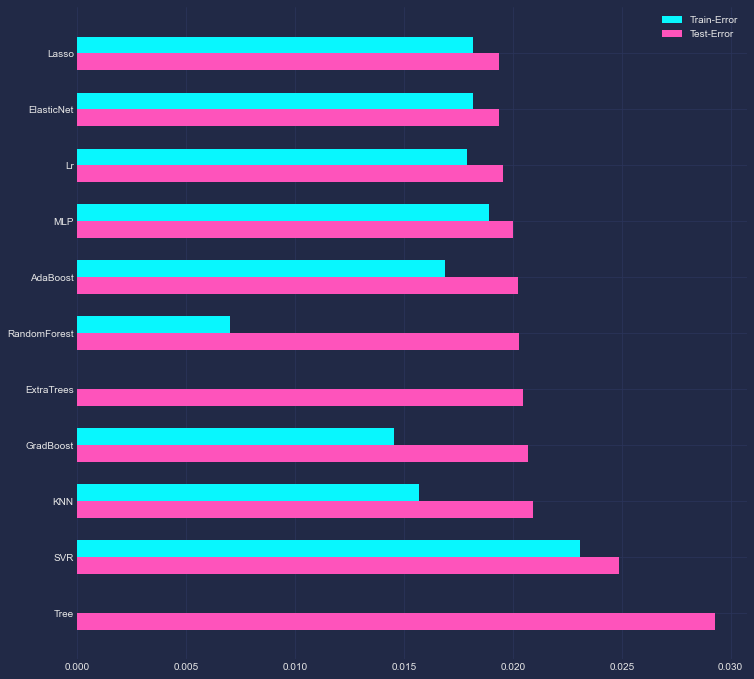

In [122]:
plt.figure(figsize=(12,12))

bar_width = 0.3
plt.barh(y=x_loc+bar_width/2, height=bar_width, width=data_train, label='Train-Error')
plt.barh(y=x_loc-bar_width/2, height=bar_width, width=data_test, label='Test-Error')

plt.yticks(x_loc, data_labels)
plt.legend()

plt.show()

- lr을 포함해 lasso, elasticnet과 같은 기본 모형이 예측 오차가 적었음
- 거리기반 모형(KNN, SVR)과 트리 모형(Tree)은 성능이 좋지 않았음
- 트리모형은 앙상블(ExtraTrees)을 포함해 과적합됨(Train Error 0)
- 이는 주가예측 케이스에 대해 설명변수와 예측변수간 선형 관계 존재로 인한 것, 앞에서 확인했듯 다양한 변수간 양의 상관관계를 보인 것과 유관

## Part 4. Time Series Models

### 4-1. 예측변수 지연값(d5, d20, d60) 제거

- 자기상관성을 활용한 시계열 모델링을 수행할 것이므로 지연데이터를 제거함.

In [123]:
y_lags = ['AAPL_d1','AAPL_d5','AAPL_d20','AAPL_d60']
X_train_nolag = X_train.drop(y_lags, axis=1)
X_test_nolag = X_test.drop(y_lags, axis=1)

print(f'X_train: {X_train.shape}')
print(f'X_train_nolag: {X_train_nolag.shape}')
print(f'X_test: {X_test.shape}')
print(f'X_test_nolag: {X_test_nolag.shape}')

X_train: (2089, 13)
X_train_nolag: (2089, 9)
X_test: (523, 13)
X_test_nolag: (523, 9)


In [124]:
X_train_nolag

,AMZN_d1,META_d1,MSFT_d1,TSLA_d1,GLD_d1,SHY_d1,SPY_d1,TLT_d1,XLP_d1
Date,,,,,,,,,
2012-08-14,0.003221,-0.058139,-0.001989,-0.057782,-0.005528,-0.000236,0.000142,-0.013640,0.003923
2012-08-15,0.017977,0.039447,0.002321,-0.000680,0.003218,-0.000356,0.001136,-0.014156,0.000560
2012-08-16,0.017246,-0.064790,0.019023,0.030153,0.005958,-0.000118,0.007352,-0.008557,0.002512
2012-08-17,-0.001574,-0.042144,0.003891,-0.009617,0.001021,0.000118,0.001337,0.004863,0.000836
2012-08-20,-0.003406,0.049165,-0.005192,-0.016802,0.003440,0.000000,0.000071,0.002054,0.000000
...,...,...,...,...,...,...,...,...,...
2020-11-24,0.006328,0.031139,0.017691,0.062272,-0.015447,0.000116,0.015985,-0.010002,0.006742
2020-11-25,0.021263,-0.004814,0.000047,0.032977,-0.000472,0.000116,-0.001543,-0.003083,-0.000597
2020-11-27,0.003219,0.008023,0.006339,0.020281,-0.010199,0.000000,0.002781,0.009658,-0.000149


### 4-2. 외생변수를 입력값으로 활용가능한 ARIMAX 모델링

In [125]:
from pmdarima.arima import auto_arima

In [160]:
arima = auto_arima(y_train, exogenous=X_train_nolag, seasonal=False)
arima

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [161]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2089
Model:               SARIMAX(2, 0, 1)   Log Likelihood                5416.365
Date:                Tue, 09 May 2023   AIC                         -10824.731
Time:                        23:45:06   BIC                         -10802.153
Sample:                             0   HQIC                        -10816.459
                               - 2089                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9851      0.046    -21.214      0.000      -1.076      -0.894
ar.L2         -0.0836      0.013     -6.525      0.000      -0.109      -0.058
ma.L1          0.9208      0.046     19.871      0.000       0.830       1.012
sigma2         0.0003   5.28e-06     62.001      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3982.74
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- AR(2), MA(1), X(외생변수: X_train_nolag)의 ARIMAX 모형 확보

### 4-3. 예측 수행, 결과 확인

In [172]:
y_pred = arima.predict(n_periods=len(y_test), exogenous=X_test_nolag)
y_pred

/Users/swsong/opt/anaconda3/envs/dataScience/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


2089   -1.229343e-03
2090    9.662355e-04
2091   -8.490848e-04
2092    7.556675e-04
2093   -6.734340e-04
            ...     
2607   -1.397388e-29
2608    1.245519e-29
2609   -1.110154e-29
2610    9.895015e-30
2611   -8.819614e-30
Length: 523, dtype: float64

In [173]:
y_pred.index = y_test.index
y_pred

Date
2020-12-02   -1.229343e-03
2020-12-03    9.662355e-04
2020-12-04   -8.490848e-04
2020-12-07    7.556675e-04
2020-12-08   -6.734340e-04
                  ...     
2022-12-22   -1.397388e-29
2022-12-23    1.245519e-29
2022-12-27   -1.110154e-29
2022-12-28    9.895015e-30
2022-12-29   -8.819614e-30
Length: 523, dtype: float64

In [178]:
y_pred.apply(lambda x : round(x, 6))

Date
2020-12-02   -0.001229
2020-12-03    0.000966
2020-12-04   -0.000849
2020-12-07    0.000756
2020-12-08   -0.000673
                ...   
2022-12-22   -0.000000
2022-12-23    0.000000
2022-12-27   -0.000000
2022-12-28    0.000000
2022-12-29   -0.000000
Length: 523, dtype: float64

In [179]:
y_test

Date
2020-12-02   -0.001138
2020-12-03   -0.005628
2020-12-04    0.012195
2020-12-07    0.005078
2020-12-08   -0.021125
                ...   
2022-12-22   -0.002802
2022-12-23   -0.013976
2022-12-27   -0.031166
2022-12-28    0.027931
2022-12-29    0.002466
Name: AAPL, Length: 523, dtype: float64

In [180]:
mean_squared_error(y_pred, y_test)

0.0003739852945895494

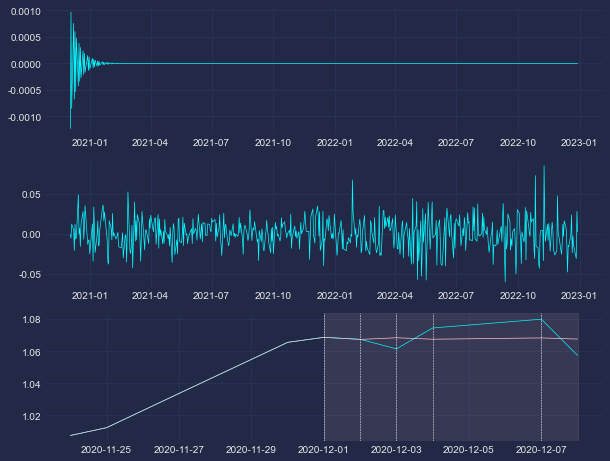

In [232]:
fig, axes = plt.subplots(3, 1, figsize=(10,8))

axes[0].plot(y_pred, linewidth=0.7)
axes[1].plot(y_test, linewidth=0.7)
axes[2].plot(np.cumprod(np.exp(pd.concat([y_train[-5:],y_test[:5]]))), linewidth=0.7)
axes[2].plot(np.cumprod(np.exp(pd.concat([y_train[-5:],y_pred[:5]]))), linewidth=0.7, c='pink')

axes[2].axvline(x=y_train.index[-1], linestyle='--', linewidth=0.5)
for i in range(4):
    axes[2].axvline(x=y_test.index[i], linestyle='--', linewidth=0.5)
    
axes[2].axvspan(xmin=y_train.index[-1],xmax=y_test.index[4], alpha=0.1, color='pink')

plt.show()

- ARIMAX 모형은 다음 1일에 대한 예측은 우수하나, 과거 자기상관성에 fitting되어 추정 시점이 멀어질수록 예측력은 떨어짐